# MD lesson 05
- **Hour: 1**
- **Professor: Huarte**

## Contents
- Computer simulation, context
- From molecular simulation to macroscopic results
- Molecular dynamics: block by block
- Molecular interactions
- Equations of motion
- Boundary conditions
- MD software

Particle of mass m that moves in one dimension and follows $V(x)=\frac{1}{2}kx^2$

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [18]:
m = 1
x = np.linspace(0, 100, 200)
k = 1
V = k*x**2/2
t = np.linspace(0, 2, 200)
a = V/m
v = a*t
s = v*t + a*t**2/2

In [133]:
class Particle():
    
    def __init__(self, m=1, k=1, init_x=0, init_v=1, init_a=0):
        self.m = 1
        self.k = k
        self.x = init_x
        self.v = init_v
        self.a = init_a
        self.x_array = []
        self.t_array = []
        self.last_time = 0
        self.E_array = []
        
    def update(self, time):
        E = k*self.x**2/2 + m*self.v**2/2
        self.E_array.append(E)
        dt = time - self.last_time
        self.last_time = time
        F = -self.k*self.x
        self.a = F/self.m
        self.v += self.a*dt
        self.t_array.append(time)
        self.x_array.append(self.x)
        self.x += self.v*dt #+ self.a*dt**2
        
    def plot(self):
        # TODO: make subplots with x, v and a
        plt.plot(self.t_array, self.x_array)
        
    def print_info(self):
        self.E_array = np.array(self.E_array)
        print("Average energy: {}".format(self.E_array.mean()))
        print("Standard deviation: {}".format(self.E_array.std()))
        

Average energy: 0.005000666565825916
Standard deviation: 3.53606657806792e-05


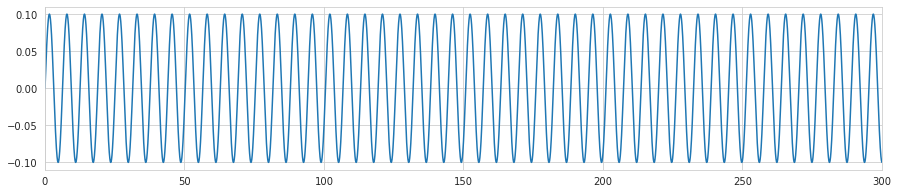

In [134]:
part = Particle(m=1, k=1, init_x=0, init_v=0.1, init_a=0)

seconds = 300
resolution = 50

for time in np.linspace(0, seconds, seconds*resolution):
    part.update(time)
    
plt.figure(figsize=(15,3))
plt.xlim((0, seconds))
part.plot()
part.print_info()

### Canonical ensemble
Consider a system in thermal, mechanical and material equilibrium: N, V and T define the macrostate.

### Monte Carlo simulations

### From micro to macro
The macroscopic properties are obtained by averaging over all the microstates in the ensemble.

In a simulation, the macrostate may be obtained from the mean value of the fluctuations of one single system along time. This is called the **Ergodic assumption**.